In [1]:
# -----------------------------
# SIMPLE SPARSE AUTOENCODER (MNIST CSV)
# -----------------------------
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Load MNIST from CSV
data = pd.read_csv(r"C:\Users\marta\Downloads\MNIST-20221031T095906Z-001\MNIST\mnist_784_csv.csv")

In [3]:
# Normalize and reshape
X = data.iloc[:, :-1].values / 255.0
X = X.reshape(-1, 784)

# Split into train/test
split = int(0.8 * len(X))
x_train, x_test = X[:split], X[split:]


In [4]:

# Build Sparse Autoencoder
from tensorflow.keras import regularizers


In [5]:
autoencoder = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(16, activation='relu'),
    # 👇 Sparsity constraint added here
    tf.keras.layers.Dense(8, activation='relu', activity_regularizer=regularizers.l1(1e-5)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(784, activation='sigmoid')
])


C:\Users\marta\Anaconda3\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [7]:
# Train
autoencoder.fit(
    x_train, x_train,
    epochs=10,
    batch_size=128,
    verbose=1,
    validation_data=(x_test, x_test)
)


Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.3010 - val_loss: 0.2400
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2208 - val_loss: 0.2085
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2030 - val_loss: 0.1980
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1960 - val_loss: 0.1929
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1919 - val_loss: 0.1902
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1895 - val_loss: 0.1886
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1878 - val_loss: 0.1866
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1865 - val_loss: 0.1854
Epoch 9/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1853 - val_loss: 0.1841
Epoch 10/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1842 - val_loss: 0.1832


In [8]:
# Reconstruct
decoded = autoencoder.predict(x_test)


438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step   


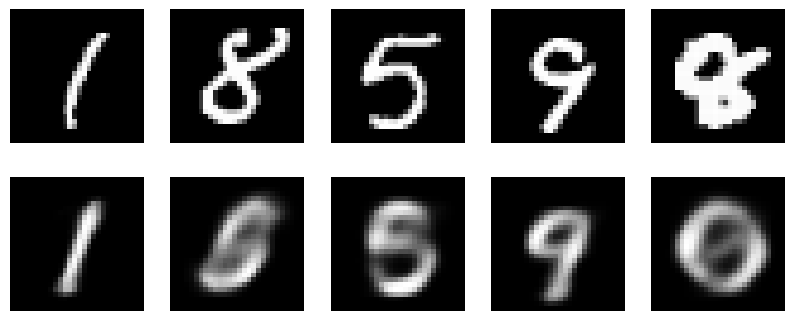

In [9]:
# Visualize Original vs Reconstructed
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.subplot(2, 5, i + 6)
    plt.imshow(decoded[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()
